# **Welcome To Machine Learning Algorithms** 
---



## *K Means Clustering*


First we will import the necessary libraries into the file. 
- Pandas is a very useful library for working with data and includes functions for analyzing and manipulating data.
- scikit-learn (sklearn) is the library that contains the tools and functions for machine learning and analysis.
- numpy is a general purpose library used for creating and working with arrays
- matplotlib is used to create graphs and visualizations of the data

In [10]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import math

Next, we need to read the data we want to analyze. we can manually enter data into a script but the Pandas library has a function to read a csv file which is an easy way to read a large dataset into memory. we first save our file path into a variable (file_path) and use this as the perameter for the read_csv() function. If the csv file is saved to the same directory as the script we only need to use the name and extension of the file and makes reading the file simple.

In [11]:
# Read the Excel file
file_path = 'atendees.csv'  # Update this with the actual path of the Excel file you want to use.
data = pd.read_csv(file_path)

# previews data from csv
print(data.head())

             name                                department      role  \
0  Cassie Hertert    Business Intelligence / Data Analytics  Consumer   
1    Michael Fite    Business Intelligence / Data Analytics   Analyst   
2  Brandon McKown  Information Technology / Infrastructure    Analyst   
3    Dylan Taylor    Business Intelligence / Data Analytics   Analyst   
4      Jake Young    Business Intelligence / Data Analytics   Analyst   

   exp clinical  exp tech  exp donation  depth clinical  depth tech  
0             1        11            10               2           3  
1            10        10            11               3           3  
2             0        11             0               0           4  
3             1         3             3               1           3  
4             0        10             0               2           3  


This section of the code is preparing the data in a format that can be understood by the machine learing algorithm. The k means clustering algorithm only accepts numeric values and the data must use the same scale to avoid a bias toward values with a higer magnitude. 

Printing the results to the console allows us to look for errors in our data. Small spelling or capitalization errors can lead to skewed results.

In [12]:
# Encode categorical features
data['department_cat'] = data['department'].astype('category').cat.codes
data['role_cat'] = data['role'].astype('category').cat.codes
data['exp_clinical'] = data['exp clinical'].astype('category').cat.codes
data['exp_tech'] = data['exp tech'].astype('category').cat.codes
data['depth_clinical'] = data['depth clinical'].astype('category').cat.codes
data['depth_tech'] = data['depth tech'].astype('category').cat.codes

# Prepare features for clustering
features = data[['department_cat', 'role_cat',  'exp_tech', 'depth_tech', 'exp_clinical','depth_clinical']]


# Prints a preview of the results of the preparation
print(features.head())

   department_cat  role_cat  exp_tech  depth_tech  exp_clinical  \
0               1         1         5           2             1   
1               1         0         4           2             4   
2               3         0         5           3             0   
3               1         0         2           2             1   
4               1         0         4           2             0   

   depth_clinical  
0               2  
1               3  
2               0  
3               1  
4               2  


This section actually applies the k means algorithm to the prepared data.

First, we need to determine K or the number of clusters we want to create. normally we would use a technique such as the elbow method (see Addendum 1) to decide how many groups the data naturally forms but for this exercise we are manually setting it.

The algorithm randomly assigns centroids then as we add each data point we calculate the distance to the centroid and assign that point to the closest cluster. Then the centroid is recalculated to represent the center of the cluster until all data points have been assigned to a cluster. This is the final step in creating our clusters that are as similar as possible. 
 
- The random state initializes the random number generator behind the scenes so it does not matter what the value is as long as it remains the same across multiple runs of the code it will allow you to validate the results.

In [13]:
# Set the number of clusters that the algorithm will create
k = 5

# Apply K-Means
kmeans = KMeans(n_clusters=k, random_state=42)
data['cluster'] = kmeans.fit_predict(features)

# previews the results of the analysis
print(data.head())

             name                                department      role  \
0  Cassie Hertert    Business Intelligence / Data Analytics  Consumer   
1    Michael Fite    Business Intelligence / Data Analytics   Analyst   
2  Brandon McKown  Information Technology / Infrastructure    Analyst   
3    Dylan Taylor    Business Intelligence / Data Analytics   Analyst   
4      Jake Young    Business Intelligence / Data Analytics   Analyst   

   exp clinical  exp tech  exp donation  depth clinical  depth tech  \
0             1        11            10               2           3   
1            10        10            11               3           3   
2             0        11             0               0           4   
3             1         3             3               1           3   
4             0        10             0               2           3   

   department_cat  role_cat  exp_clinical  exp_tech  depth_clinical  \
0               1         1             1         5            

The following code visualizes the results of the analysis to show how the individuals within them compare. There are many ways to visualize the data so we won't go into detail here but what is important is the ability to see how the groups compare. 

- How do the individuals in the clusters compare? Do you think they were matched approriately? How do you think the variables we chose affected the analysis?

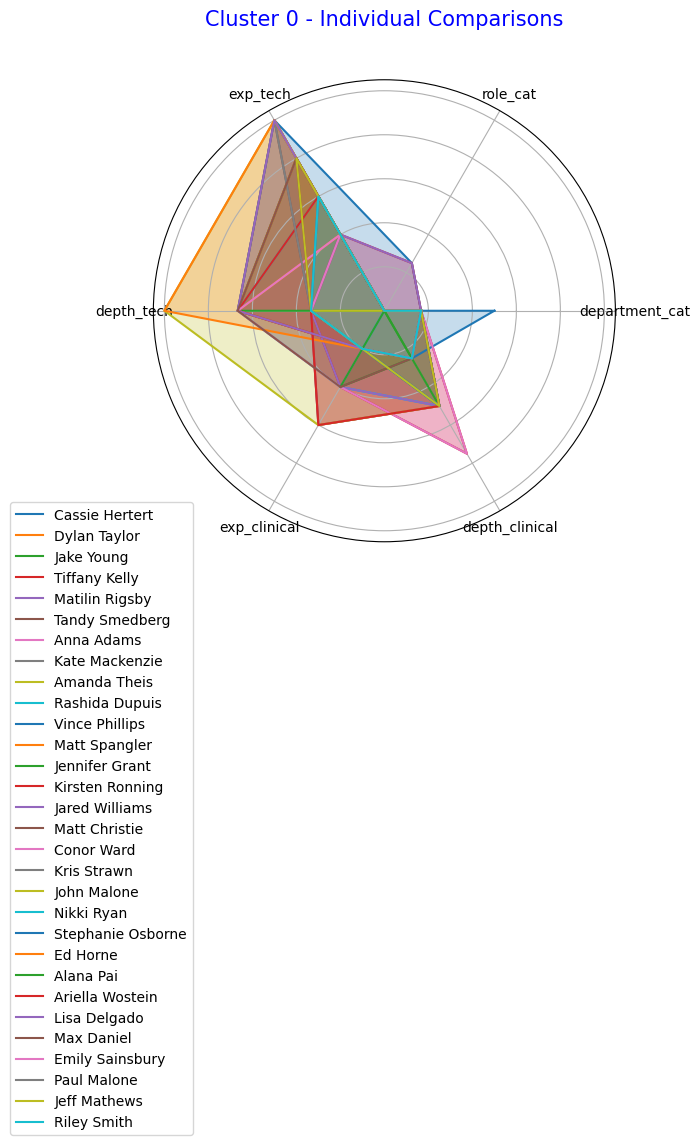

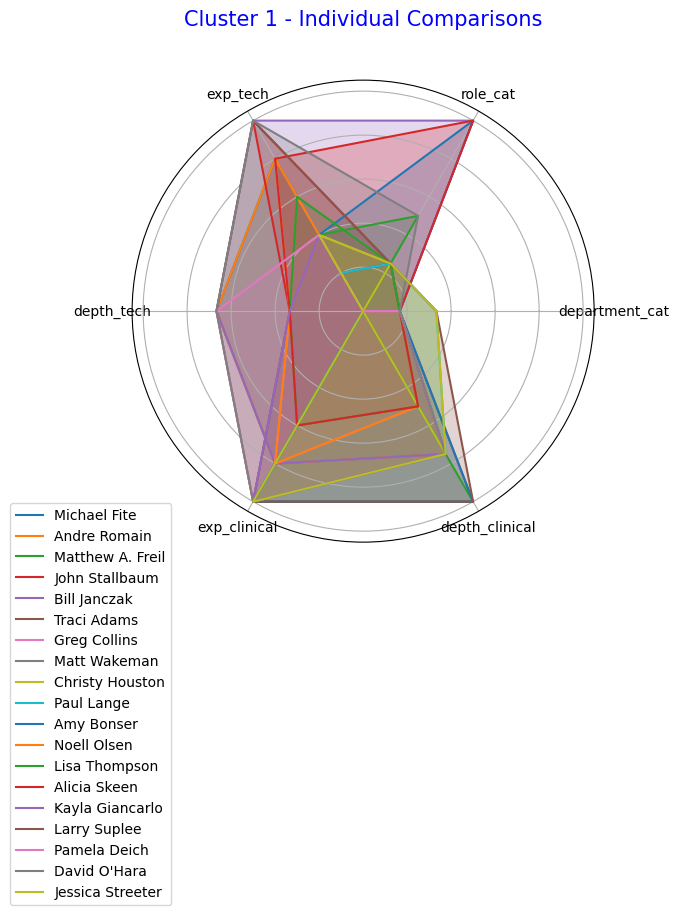

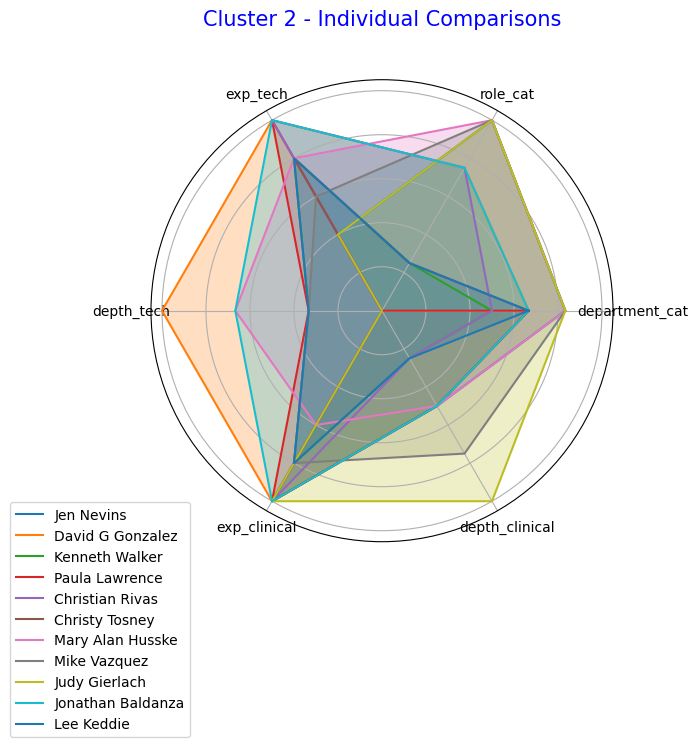

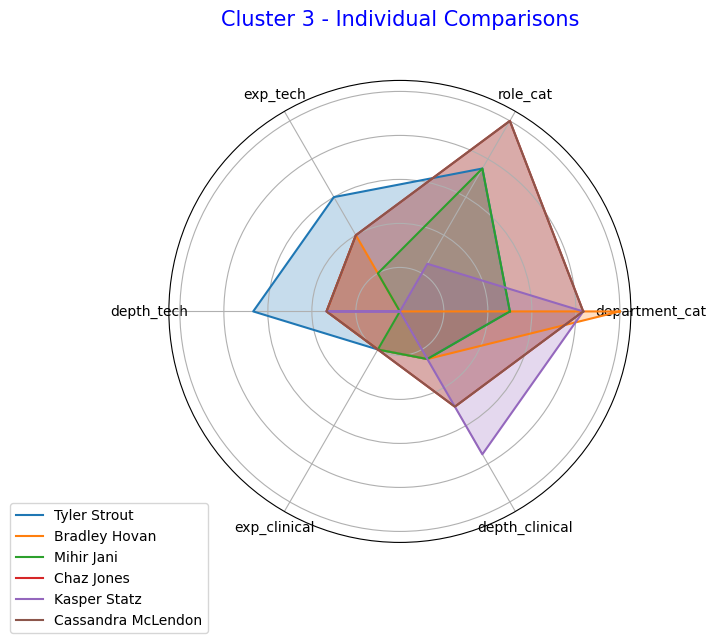

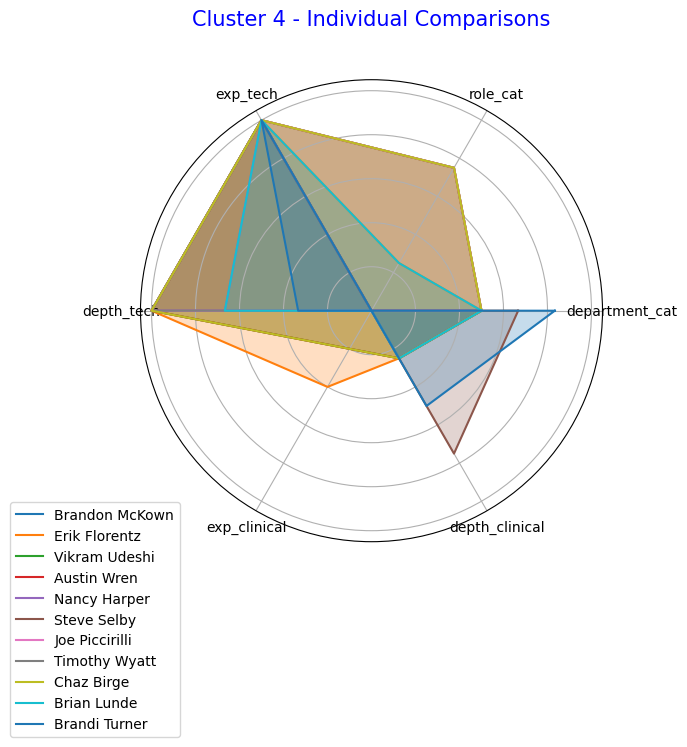

In [14]:
# Prepare data for radar chart
scaler = MinMaxScaler()
scaled_features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

# Add cluster and name back to the scaled data
scaled_features['cluster'] = data['cluster']
scaled_features['name'] = data['name']

# Function to create radar chart comparing individuals within each cluster
def create_radar_chart_for_clusters(scaled_data, num_clusters):
    categories = list(scaled_data.columns[:-2])  # Exclude 'cluster' and 'name'
    num_vars = len(categories)

    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    for i in range(num_clusters):
        cluster_data = scaled_data[scaled_data['cluster'] == i]
        fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

        for _, row in cluster_data.iterrows():
            values = row[categories].tolist()
            values += values[:1]
            ax.plot(angles, values, label=row['name'])
            ax.fill(angles, values, alpha=0.25)

        ax.set_yticklabels([])
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(categories)

        ax.set_title(f'Cluster {i} - Individual Comparisons', size=15, color='blue', y=1.1)
        ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

        plt.show()

# Plot radar charts for each cluster comparing individuals within that cluster
create_radar_chart_for_clusters(scaled_features, k)

Congratulations! You just used the k means clusters machine learning algrithm to group data with multiple variables into clusters based on the similarity of their attributes. This is the end of an analysis using K Means Clustering but for this exercise we are going to evenly divide the clusters into groups to make groups with balanced expertise.

--- 

--- Addendum 1:
For simplcity we are manually setting the number of clusters we want to see, but in a situation where you do not know how many clusters to use you would use a technique such as the Elbow Method or the Silhouette Score to determine how many clusters ideally represent the dataset. The following code is an example of the Elbow method which plots the variation between using different numbers of clusters. The 'elbow' on the graph is where adding more clusters does not add any informantion and risks over-fitting the model and sub dividing actual groups. *

- how many natural groups do you think this data set forms? what should we have used for K?


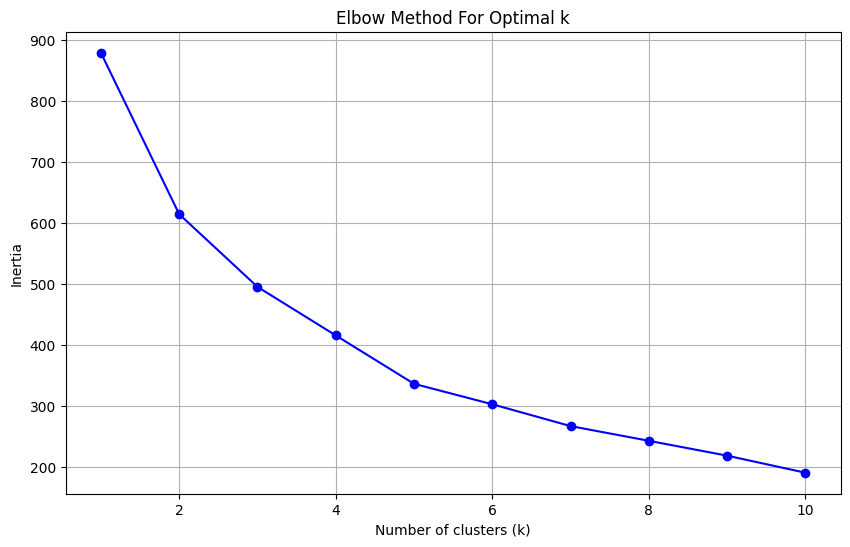

In [15]:
# Elbow Method to find the optimal number of clusters
inertia = []
K = range(1, 11)  # Test cluster numbers from 1 to 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method result
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

ADDENDUM 2: In most cases we use K means to create the most similar groups possible but, once we have this data saved to a variable we can manipulate it in various other ways. Here we are taking the groups and distributing them evenly so that the groups are balanced acroos the clusters.

This step is creating empty buckets (arrays) and then looping through the clusters and evenly distribuing each cluster into the buckets. we essentially created the most similar groups we can with the clusters and now we will evenly split them into balanced groups.

In [16]:
# Determine the number of groups needed (with 8 people per group)
total_people = len(data)
group_size = 8
num_group = math.ceil(total_people / group_size)

# Initialize lists to hold the balanced groups
groups = [[] for _ in range(num_group)]

# Distribute individuals to ensure balanced groups
for i, person in data.iterrows():
    smallest_group = min(groups, key=len)
    smallest_group.append(person)

# Assign group numbers to the data
data['balanced_group'] = None
for group_number, group in enumerate(groups):
    for person in group:
        data.loc[person.name, 'balanced_group'] = group_number

Finally we print the results to the console. The balanced_group column represnts the buckets we created to hold the evenly distributed clusters and labels each row with a group number.

In [17]:
# this orders the data frame by the groups for easy analysis
data = data.sort_values(by=['balanced_group'])

# Print the resulting data
print(data[['name', 'department', 'role', 'exp_clinical', 'exp_tech', 'depth_clinical', 'depth_tech', 'cluster', 'balanced_group']])

# Uncommenting this line can be used to export the results to a csv file
# data.to_csv('KmeansOutput.csv')

                name                                department  \
0     Cassie Hertert    Business Intelligence / Data Analytics   
40       Kris Strawn    Business Intelligence / Data Analytics   
30   Kirsten Ronning    Business Intelligence / Data Analytics   
60      Mike Vazquez                           Quality Systems   
20    Kenneth Walker  Information Technology / Infrastructure    
..               ...                                       ...   
69        Chaz Birge  Information Technology / Infrastructure    
29   Christy Houston                            Administration   
9   Matthew A. Freil                            Administration   
59        Chaz Jones                           Quality Systems   
39        Conor Ward    Business Intelligence / Data Analytics   

                 role  exp_clinical  exp_tech  depth_clinical  depth_tech  \
0            Consumer             1         5               2           2   
40            Analyst             1         5        

### Further reading:
- https://en.wikipedia.org/wiki/K-means_clustering
- https://stanford.edu/~cpiech/cs221/handouts/kmeans.html
- https://www.geeksforgeeks.org/k-means-clustering-introduction/
- http://varianceexplained.org/r/kmeans-free-lunch/
- https://en.wikipedia.org/wiki/Elbow_method_(clustering)
- https://medium.com/@evgen.ryzhkov/5-stages-of-data-preprocessing-for-k-means-clustering-b755426f9932
- https://medium.com/analytics-vidhya/why-is-scaling-required-in-knn-and-k-means-8129e4d88ed7#:~:text=We%20can%20clearly%20see%20that,like%20KNN%20or%20K%2DMeans.
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
- https://www.baeldung.com/cs/k-means-flaws-improvements
- https://datarundown.com/k-means-clustering-pros-cons/
